<a href="https://colab.research.google.com/github/estebanhernandezr/AWEN/blob/master/AndreyEsteban_LizarazoHernandez_Clasificacion_1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto I: El problema de los dígitos

Eobjetivo es evaluar sus conocimientos en Clasificación lineal.utilizando la  información sobre la base de datos de dígitos que se encuentra en en la libreria de scikit-learn utilicen sus conocimientos en Machine Learning para resolver este problema.

Para este proposito se divide el problema en las siguientes tareas:

1. Cargen los datos *digits* de la librería scikit learn.
2. Implementen un clasificador usando KNN. Determine una forma de evaluar el rendimiento de este clasificador par adiferentes valores de K.
3. Implemente un clasificador utiliznado regresión logistica. Para esto desarrolle 10 clasificadores diferentes (porque se tienen 10 clases). Implemente la función de decisión de clase, escogiendo como clase la salida correspondiente al clasificador con mayor probabilidad.
4. Para cada uno de los 10 clasificadores, ubique los $\theta_i$, para $i~= 0$  en una matriz siguiendo el mismo orden que las matrices de los datos de entrenamiento, y realice un mapa de calor para cada clasificador, indicando la clase que detecta.
5. Proponga una solución alternativa a este problema.

Respondan las siguientes preguntas:

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?
2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logistica? ¿Funciona uno mejor que otro?, ¿Porqué?
3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno qu ecree se debe hacer para mejorarlo?
4. Al realizar el mapa de calor con los pesos de la regresión logistica, par alos diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.

Entreguen el notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluir las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Nombre1__Apellido1_Clasificación_1_ML.





### **LIBRERIAS**

In [2]:
# A CONTINUACION IMPORTAMOS LAS LIBRERIAS QUE UTILIZAREMOS
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns # para graficas estadisticas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### **VISUALIZACIÓN DE LOS DATOS**

In [3]:
# A CONTINUACION CARGAMOS EL DATASET DE DIGITS A PYTHON COMO UN DICCIONARIO
digits_dataset = datasets.load_digits(as_frame=False)

In [4]:
# A CONTINUACION HACEMOS LA VISUALIZACIÓN MÁS FACIL POSIBLE EN PYTHON: IMPRIMIR
# LA TABLA CON EL MÉTODO "print()" Y VEMOS LO DATOS DE LA MANERA MÁS CRUDA.
print(digits_dataset)
# PODEMOS VER QUE EL DATASET ES EN REALIDAD UN DICCIONARIO

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [5]:
# A CONTINUACIÓN IMPRIMIMOS LAS LLAVES DEL DICCIONARIO
print(digits_dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [6]:
# A CONTINUACION IMPRIMIMOS LOS VALORES DE LA LLAVE "data" Y SUS DIMENSIONES
print(digits_dataset['data'])
print(digits_dataset['data'].shape)
# VEMOS QUE "data" ES UNA MATRIZ DE TAMAÑO (1797, 64)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)


In [7]:
# A CONTINUACION IMPRIMIMOS LOS VALORES DE LA LLAVE "target" Y SUS DIMENSIONES
print(digits_dataset['target'])
print(digits_dataset['target'].shape)
# VEMOS QUE "target" ES UN VECTOR COLUMNA DE DIMENSIONES (1797, )

[0 1 2 ... 8 9 8]
(1797,)


In [8]:
# A CONTINUACION CARGAMOS EL DATASET DE DIGITS A PYTHON COMO UN PANDAS DATAFRAME
digits_dataframe = datasets.load_digits(as_frame=True)

In [9]:
# "feature_names" ES EL DOMINIO DE LA 
feature_names = digits_dataframe['feature_names']
print(feature_names)
print(len(feature_names))

# "target_names" ES EL DOMINIO DE LA VARIABLE "y"
target_names = digits_dataframe['target_names']
print(target_names)
print(len(target_names))

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
64
[0 1 2 3 4 5 6 7 8 9]
10


In [10]:
data = digits_dataframe['data']
data.head(n=-1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,4.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,3.0,4.0,3.0,0.0,0.0,7.0,16.0,5.0,3.0,15.0,8.0,0.0,0.0,13.0,16.0,13.0,15.0,16.0,2.0,0.0,0.0,12.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,0.0,4.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0


In [11]:
target = digits_dataframe['target']
target.head(n=-1)

0       0
1       1
2       2
3       3
4       4
       ..
1791    4
1792    9
1793    0
1794    8
1795    9
Name: target, Length: 1796, dtype: int64

In [12]:
digits_datatuples = datasets.load_digits(return_X_y=True, as_frame=True)
print(digits_datatuples)

(      pixel_0_0  pixel_0_1  pixel_0_2  ...  pixel_7_5  pixel_7_6  pixel_7_7
0           0.0        0.0        5.0  ...        0.0        0.0        0.0
1           0.0        0.0        0.0  ...       10.0        0.0        0.0
2           0.0        0.0        0.0  ...       16.0        9.0        0.0
3           0.0        0.0        7.0  ...        9.0        0.0        0.0
4           0.0        0.0        0.0  ...        4.0        0.0        0.0
...         ...        ...        ...  ...        ...        ...        ...
1792        0.0        0.0        4.0  ...        9.0        0.0        0.0
1793        0.0        0.0        6.0  ...        6.0        0.0        0.0
1794        0.0        0.0        1.0  ...        6.0        0.0        0.0
1795        0.0        0.0        2.0  ...       12.0        0.0        0.0
1796        0.0        0.0       10.0  ...       12.0        1.0        0.0

[1797 rows x 64 columns], 0       0
1       1
2       2
3       3
4       4
       ..


In [13]:
digits_dataframe = datasets.load_digits(as_frame=True)
df = digits_dataframe['frame']
df.head(n=-1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,4.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,3.0,4.0,3.0,0.0,0.0,7.0,16.0,5.0,3.0,15.0,8.0,0.0,0.0,13.0,16.0,13.0,15.0,16.0,2.0,0.0,0.0,12.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,0.0,4.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8


[[ True  True False  True  True  True  True  True]
 [ True False False  True False False  True  True]
 [ True  True False False False  True False  True]
 [ True  True False  True False False False  True]
 [ True  True False False False False  True  True]
 [ True False  True False False False False  True]
 [ True False False False False  True  True  True]
 [ True False False False False False  True  True]]


<Figure size 432x288 with 0 Axes>

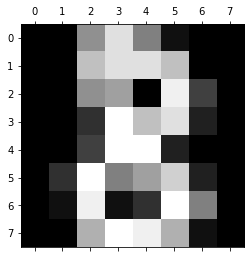

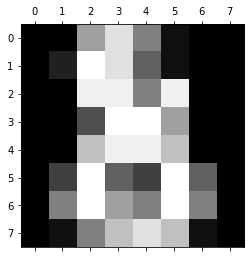

In [14]:
plt.gray()
plt.matshow(digits_dataframe['images'][8])
plt.matshow(digits_dataframe['images'][1796])

print(digits_dataframe['images'][8] == digits_dataframe['images'][1796])

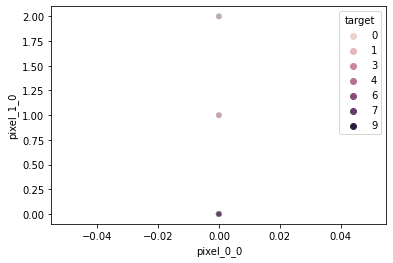

In [15]:
sns.scatterplot(x='pixel_0_0', y='pixel_1_0',hue='target', data=df, alpha=0.2);

### **ANÁLISIS DE LOS DATOS**

In [16]:
digits_dataframe = datasets.load_digits(as_frame=True)
df = digits_dataframe['frame']
df.head(n=-1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.0,0.0,0.0,3.0,15.0,4.0,0.0,0.0,0.0,0.0,4.0,16.0,12.0,0.0,0.0,0.0,0.0,0.0,12.0,15.0,3.0,4.0,3.0,0.0,0.0,7.0,16.0,5.0,3.0,15.0,8.0,0.0,0.0,13.0,16.0,13.0,15.0,16.0,2.0,0.0,0.0,12.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,0.0,4.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,4.0,0.0,0.0,4
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8


[[ True  True False  True  True  True  True  True]
 [ True False False  True False False  True  True]
 [ True  True False False False  True False  True]
 [ True  True False  True False False False  True]
 [ True  True False False False False  True  True]
 [ True False  True False False False False  True]
 [ True False False False False  True  True  True]
 [ True False False False False False  True  True]]


<Figure size 432x288 with 0 Axes>

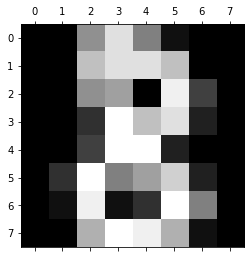

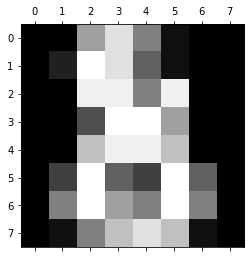

In [17]:
plt.gray()
plt.matshow(digits_dataframe['images'][8])
plt.matshow(digits_dataframe['images'][1796])

print(digits_dataframe['images'][8] == digits_dataframe['images'][1796])

In [18]:
df.target.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [19]:
df3 = df.loc[df['target'] == 3]
df3.head(n=len(df3))

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
13,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,13.0,8.0,9.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,14.0,15.0,3.0,0.0,0.0,0.0,0.0,11.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,4.0,0.0,0.0,1.0,5.0,6.0,13.0,16.0,6.0,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0,3
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,11.0,8.0,8.0,12.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,13.0,7.0,0.0,0.0,0.0,0.0,2.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0,0.0,0.0,0.0,0.0,7.0,8.0,14.0,15.0,0.0,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0,3
45,0.0,0.0,9.0,16.0,13.0,6.0,0.0,0.0,0.0,0.0,6.0,5.0,16.0,16.0,0.0,0.0,0.0,0.0,0.0,8.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.0,0.0,0.0,0.0,4.0,8.0,11.0,15.0,12.0,0.0,0.0,0.0,11.0,14.0,12.0,8.0,0.0,0.0,3
59,0.0,1.0,10.0,15.0,11.0,1.0,0.0,0.0,0.0,3.0,8.0,8.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,15.0,1.0,0.0,0.0,0.0,0.0,11.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,3.0,4.0,10.0,16.0,1.0,0.0,0.0,0.0,13.0,16.0,15.0,10.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.0,0.0,7.0,16.0,16.0,15.0,8.0,0.0,0.0,0.0,12.0,15.0,15.0,16.0,11.0,0.0,0.0,0.0,0.0,3.0,14.0,15.0,2.0,0.0,0.0,0.0,1.0,14.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,15.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,14.0,1.0,0.0,0.0,0.0,10.0,15.0,10.0,4.0,0.0,0.0,3
1756,0.0,0.0,10.0,15.0,15.0,11.0,4.0,0.0,0.0,1.0,10.0,5.0,7.0,16.0,10.0,0.0,0.0,0.0,0.0,1.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,11.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,14.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,15.0,3.0,0.0,0.0,0.0,6.0,11.0,16.0,8.0,0.0,0.0,3
1758,0.0,0.0,3.0,13.0,16.0,5.0,0.0,0.0,0.0,6.0,15.0,9.0,15.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,10.0,0.0,0.0,0.0,0.0,7.0,14.0,16.0,3.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,14.0,3.0,0.0,0.0,0.0,0.0,3.0,2.0,15.0,10.0,0.0,0.0,0.0,4.0,5.0,12.0,16.0,14.0,0.0,0.0,0.0,5.0,13.0,14.0,8.0,2.0,0.0,3
1765,0.0,1.0,7.0,13.0,16.0,13.0,0.0,0.0,0.0,7.0,16.0,16.0,16.0,14.0,0.0,0.0,0.0,1.0,7.0,16.0,10.0,1.0,0.0,0.0,0.0,1.0,16.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,15.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,15.0,3.0,0.0,0.0,0.0,1.0,5.0,13.0,16.0,7.0,0.0,0.0,0.0,8.0,15.0,10.0,6.0,0.0,0.0,3


SUMA PROMEDIO


<Figure size 432x288 with 0 Axes>

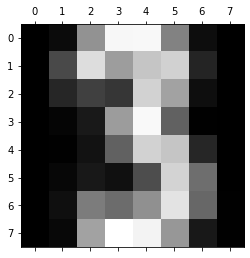

In [20]:
sum = np.zeros((8,8))
for i in range(0, len(df3), 1):
    #print(df3.iloc[i,: -1])
    vector = df3.iloc[i,: -1]
    matrix = vector.values.reshape(8,8)
    sum += matrix
    #plt.gray()
    #plt.matshow(matrix)

print("SUMA PROMEDIO")
plt.gray()
plt.matshow(sum)

In [21]:
print(sum == digits_dataframe['images'][15])
print(np.linalg.norm(sum - digits_dataframe['images'][15]))

print(np.linalg.norm(sum - digits_dataframe['images'][0]))

[[ True False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False  True]
 [ True False False False False False False  True]
 [ True False False False False False False  True]
 [ True False False False False False False  True]
 [ True False False False False False False False]
 [ True False False False False False False False]]
10141.295923105685
10147.135802777058


In [22]:
df2 = df.loc[df['target'] == 2]
df2.head(n=len(df2))

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
12,0.0,0.0,5.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,14.0,7.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,12.0,0.0,0.0,0.0,0.0,2.0,10.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,15.0,9.0,8.0,2.0,0.0,0.0,3.0,11.0,8.0,13.0,12.0,4.0,2
22,0.0,0.0,8.0,16.0,5.0,0.0,0.0,0.0,0.0,1.0,13.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,12.0,0.0,0.0,0.0,0.0,0.0,3.0,15.0,5.0,0.0,0.0,0.0,0.0,0.0,14.0,15.0,8.0,8.0,3.0,0.0,0.0,0.0,7.0,12.0,12.0,12.0,13.0,1.0,2
50,0.0,0.0,0.0,5.0,14.0,12.0,2.0,0.0,0.0,0.0,7.0,15.0,8.0,14.0,4.0,0.0,0.0,0.0,6.0,2.0,3.0,13.0,1.0,0.0,0.0,0.0,0.0,1.0,13.0,4.0,0.0,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,8.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,14.0,16.0,11.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,13.0,3.0,0.0,2
51,0.0,0.0,0.0,3.0,15.0,10.0,1.0,0.0,0.0,0.0,0.0,11.0,10.0,16.0,4.0,0.0,0.0,0.0,0.0,12.0,1.0,15.0,6.0,0.0,0.0,0.0,0.0,3.0,4.0,15.0,4.0,0.0,0.0,0.0,0.0,6.0,15.0,6.0,0.0,0.0,0.0,4.0,15.0,16.0,9.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,15.0,9.0,3.0,0.0,0.0,0.0,0.0,4.0,9.0,14.0,7.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,0.0,2.0,11.0,16.0,13.0,2.0,0.0,0.0,0.0,11.0,15.0,12.0,16.0,7.0,0.0,0.0,0.0,7.0,6.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,7.0,16.0,4.0,3.0,3.0,0.0,0.0,3.0,15.0,16.0,15.0,15.0,11.0,0.0,0.0,2.0,13.0,12.0,9.0,0.0,0.0,0.0,2
1751,0.0,0.0,11.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,15.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,4.0,15.0,2.0,0.0,0.0,0.0,1.0,9.0,15.0,9.0,3.0,0.0,0.0,0.0,0.0,16.0,16.0,16.0,16.0,7.0,0.0,0.0,0.0,10.0,13.0,8.0,4.0,1.0,0.0,2
1780,0.0,3.0,14.0,15.0,6.0,0.0,0.0,0.0,0.0,7.0,15.0,14.0,15.0,0.0,0.0,0.0,0.0,2.0,7.0,2.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,7.0,15.0,2.0,0.0,0.0,0.0,0.0,5.0,15.0,14.0,4.0,1.0,0.0,0.0,4.0,15.0,16.0,16.0,16.0,6.0,0.0,0.0,4.0,15.0,13.0,12.0,11.0,1.0,0.0,2
1782,0.0,1.0,10.0,13.0,2.0,0.0,0.0,0.0,0.0,10.0,16.0,16.0,12.0,0.0,0.0,0.0,0.0,9.0,9.0,8.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,11.0,15.0,0.0,0.0,0.0,0.0,0.0,4.0,16.0,13.0,2.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,16.0,13.0,0.0,0.0,0.0,9.0,13.0,11.0,10.0,9.0,0.0,2


<Figure size 432x288 with 0 Axes>

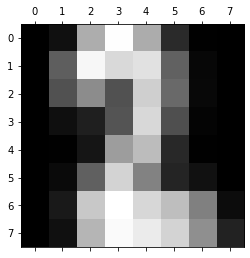

In [23]:
df2 = df.loc[df['target'] == 2]
vector_prom = []
for i in range(0, 8, 1):
    for j in range(0, 8, 1):
        vector_prom.append(df2['pixel_'+str(i)+'_'+str(j)].mean())
vector_prom = np.array(vector_prom)
matrix_prom = vector_prom.reshape(8,8)

plt.gray()
plt.matshow(matrix_prom)

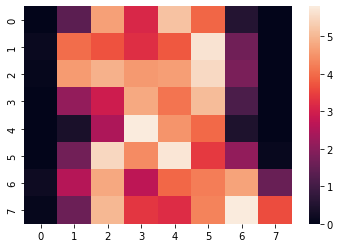

In [24]:
df2 = df.loc[df['target'] == 2]
vector_vars = []
for i in range(0, 8, 1):
    for j in range(0, 8, 1):
        vector_vars.append(df2['pixel_'+str(i)+'_'+str(j)].std())
vector_vars = np.array(vector_vars)
matrix_vars = vector_vars.reshape(8,8)

#plt.gray()
#plt.matshow(matrix_vars)

ax = sns.heatmap(matrix_vars)

134.88700564971754


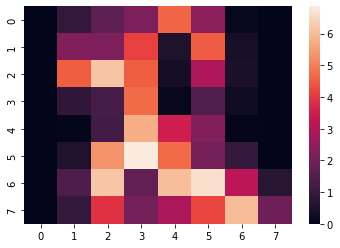

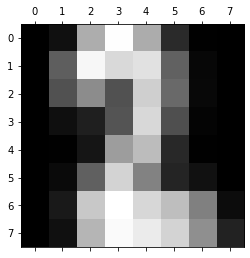

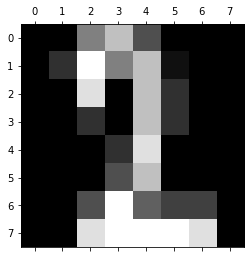

In [30]:
vector = df2.iloc[100, : -1]
matrix = vector.values.reshape(8,8)
matrix_diff = abs(matrix_prom - matrix)

ax = sns.heatmap(matrix_diff)

plt.gray()
plt.matshow(matrix_prom)

plt.gray()
plt.matshow(matrix)

print(matrix_diff.sum())

### **TEST SUITE**

In [94]:
def mean_image(image_df):
    mean_vector = []
    for i in range(0, 8, 1):
        for j in range(0, 8, 1):
            mean_vector.append(image_df['pixel_'+str(i)+'_'+str(j)].mean())
    mean_vector = np.array(mean_vector)
    mean_matrix = mean_vector.reshape(8,8)
    return mean_matrix

def var_image(image_df):
    var_vector = []
    for i in range(0, 8, 1):
        for j in range(0, 8, 1):
            var_vector.append(image_df['pixel_'+str(i)+'_'+str(j)].std())
    var_vector = np.array(var_vector)
    var_matrix = var_vector.reshape(8,8)
    return var_matrix

def compare_image(image, mean_image):
    input_matrix = image.values.reshape(8,8)
    diff_matrix = abs(mean_image - input_matrix)

    ax = sns.heatmap(diff_matrix)

    plt.gray()
    plt.matshow(mean_image)
    plt.title("MEAN IMAGE")

    plt.gray()
    plt.matshow(input_matrix)
    plt.title("INPUT IMAGE")

    print("DESVIACIÓN TOTAL DE LA MEDIA: ", diff_matrix.sum())
    print("DESVIACIÓN RALATIVA DE LA MEDIA: ", diff_matrix.sum()/input_matrix.sum())

DESVIACIÓN TOTAL DE LA MEDIA:  109.67977528089887
DESVIACIÓN RALATIVA DE LA MEDIA:  0.3406204201270151


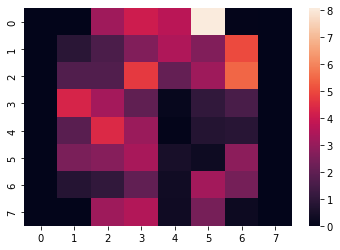

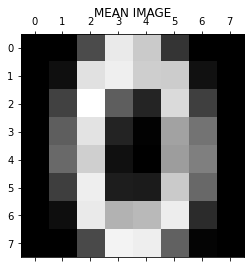

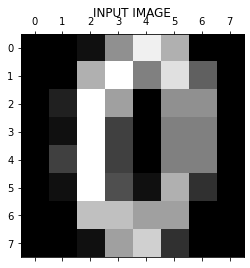

In [100]:
df0 = df.loc[df['target'] == 0]
df1 = df.loc[df['target'] == 1]
df2 = df.loc[df['target'] == 2]
df3 = df.loc[df['target'] == 3]
df4 = df.loc[df['target'] == 4]
df5 = df.loc[df['target'] == 5]
df6 = df.loc[df['target'] == 6]
df7 = df.loc[df['target'] == 7]
df8 = df.loc[df['target'] == 8]
df9 = df.loc[df['target'] == 9]

imagen = df0.iloc[1, : -1]
imagen_prom = mean_image(df0)
compare_image(imagen, imagen_prom)